# Plot discriminating variables

In [1]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette

Welcome to JupyROOT 6.18/00


## Load data

In [2]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/10000'
df = pd.read_csv(os.path.join(DATA_DIR, 'dftrain.csv'))
print(df.shape)
df.head()

(14206, 14)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,dist2charge,label,rec_energy
0,0,0,4,21408.335401,11140.1160,4807.88870,10.362349,6.491467,0.025355,0.044280,0.431583,0.000000,3,13573.675275
1,0,1,4,924.508020,NaN,1073.34800,NaN,1.968934,NaN,0.157025,NaN,16.782349,2,NaN
2,0,2,4,1100.245997,783.3830,904.80566,1.832438,1.448789,0.197458,0.176471,1.154998,128.826170,2,736.718655
3,0,3,4,1643.766190,1418.5334,1472.52690,1.834256,1.933337,0.262542,0.180723,1.038063,69.048379,2,1397.782979
4,0,4,4,10000.615035,8540.6990,9518.20100,2.460657,1.579473,0.173625,0.339236,1.114452,56.487324,2,8165.031964


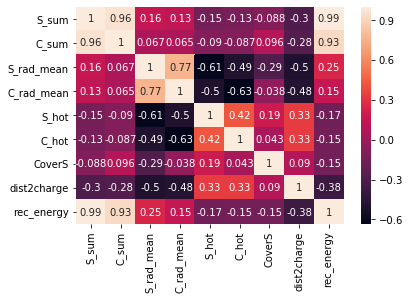

In [3]:
excl_columns = ['eventId', 'clusterId', 'PrimaryDecayMode', 'VecShowerEnergy', 'label']
df_vars = df.drop(excl_columns, axis=1)
corrMatrix = df_vars.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Convert to RDataFrame

In [4]:
f = ROOT.TFile('dftrain.root', 'recreate' )
t = ROOT.TTree('train', 'tree with train set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
S_sum = array('d', [0.])
C_sum = array('d', [0.])
S_rad_mean = array('d', [0.])
C_rad_mean = array('d', [0.])
S_hot = array('d', [0.])
C_hot = array('d', [0.])
CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
t.Branch('S_sum', S_sum, "S_sum/D")
t.Branch('C_sum', C_sum, "C_sum/D")
t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
t.Branch('S_hot', S_hot, "S_hot/D")
t.Branch('C_hot', C_hot, "C_hot/D")
t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
    S_sum[0] = df.S_sum.values[i]
    C_sum[0] = df.C_sum.values[i]
    S_rad_mean[0] = df.S_rad_mean.values[i]
    C_rad_mean[0] = df.C_rad_mean.values[i]
    S_hot[0] = df.S_hot.values[i]
    C_hot[0] = df.C_hot.values[i]
    CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

## Load RDataFrame

In [5]:
d = ROOT.ROOT.RDataFrame("train", "dftrain.root")

In [6]:
d.AsNumpy()

{'PrimaryDecayMode': numpy.array([4, 4, 4, ..., 4, 4, 4], dtype=int32),
 'VecShowerEnergy': numpy.array([21408.33540089,   924.50801965,  1100.24599705, ...,
               1546.25015299,  9001.60140181,  6665.59402163]),
 'S_sum': numpy.array([11140.116 ,        nan,   783.383 , ...,  1110.4525,
               7938.584 ,  5854.5903]),
 'C_sum': numpy.array([4807.8887 , 1073.348  ,  904.80566, ...,  878.1933 ,
              8027.928  , 5934.458  ]),
 'S_rad_mean': numpy.array([10.362349 ,        nan,  1.8324381, ...,  1.8024198,
               2.2592833,  2.362581 ]),
 'C_rad_mean': numpy.array([6.4914665, 1.9689337, 1.4487892, ..., 1.4088335, 2.1442318,
              1.9738507]),
 'S_hot': numpy.array([0.02535458,        nan, 0.19745822, ..., 0.2208202 ,
              0.15578914, 0.11689573]),
 'C_hot': numpy.array([0.04428044, 0.15702479, 0.17647061, ..., 0.16161615,
              0.20110498, 0.19282511]),
 'CoverS': numpy.array([0.43158336,        nan, 1.15499782, ..., 0.79084274,
 

In [7]:
for col in ["VecShowerEnergy", "S_sum", "C_sum", "rec_energy"]:
    d = d.Define(f"{col}_GeV", f"{col}*1e-3")

## Plot variables for each label

In [22]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1", "c1", 800, 1000)
c1.Divide(2,4)

In [23]:
print(d.Count().GetValue())
palette_lst = [palette['e-'], palette['mu-'], palette['gamma'], palette['pi-']]

14206


In [24]:
ratio = 2.
labelsize = 0.03 * ratio
titlesize = 0.04 * ratio
xtitleoffset = 1
ytitleoffset = 0.8
labeloffset = 0.005 * ratio
linewidth = 2
ticklength = 0.

0 1293
1 738
2 8727
3 2708


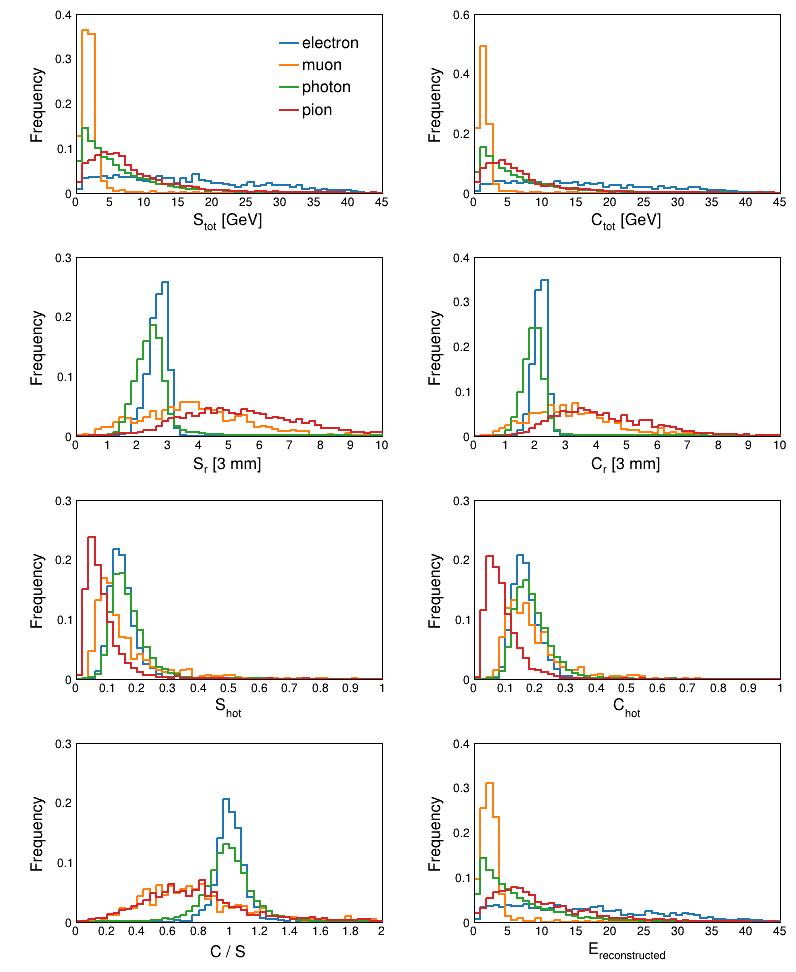

In [33]:
ROOT.gStyle.SetOptStat("ou")
xmax = [45, 45, 10., 10., 1., 1., 2., 45] #200.]
ymax = [0.4, 0.6, 0.3, 0.4, 0.3, 0.3, 0.3, 0.4] #1.1]
xtitle = ['S_{tot} [GeV]', 'C_{tot} [GeV]', 'S_{r} [3 mm]', 'C_{r} [3 mm]', 
          'S_{hot}', 'C_{hot}', 'C / S', 'E_{reconstructed}'] #'d_{c} [3 mm]']
varsname = ["S_sum_GeV", "C_sum_GeV", "S_rad_mean", "C_rad_mean", 
            "S_hot", "C_hot", "CoverS", 'rec_energy_GeV'] #"dist2charge"]
hs = [None, None, None, None, None, None, None, None]
label_dict = {0: 'electron', 1: 'muon', 2: 'photon', 3: 'pion'}
for i,col in enumerate(varsname):
    c1.cd(i+1)
    ROOT.gPad.SetLeftMargin(0.18)
    ROOT.gPad.SetRightMargin(0.02)
    ROOT.gPad.SetBottomMargin(0.18)
    ROOT.gPad.SetTopMargin(0.02)
    
    hs[i] = ROOT.THStack("hs","");
    for j in np.unique(df.label.values):
        model = ("", label_dict[j], 50, 0., xmax[i]) #d.Filter(f"!std::isnan({col})").Max(col).GetValue())
        d2 = d.Filter(f'label == {j} && !std::isnan({col})')
        if i == 0:
            print(j, d2.Count().GetValue())
        h = d2.Histo1D(model, col)
        h.SetLineColor(palette_lst[j].GetNumber())
        h.SetLineWidth(linewidth)
#         h.GetXaxis().SetRange(1, h.GetNbinsX() + 1)
#         if j == 0:
#             h.DrawNormalized("hist")
#         else:
#             h.DrawNormalized("same")
        h.Scale(1./h.Integral())
        hs[i].Add(h.GetPtr().Clone())
#     hs[i].GetXaxis().SetRange(1, h.GetNbinsX() + 1)

    hs[i].Draw("hist nostack")
    ROOT.gPad.Modified()
    ROOT.gPad.Update()
    hs[i].GetXaxis().SetTitle(xtitle[i])
    hs[i].GetYaxis().SetTitle("Frequency")    
    
    hs[i].GetXaxis().SetTickLength(ticklength)
    hs[i].GetYaxis().SetTickLength(ticklength)
    hs[i].GetXaxis().SetTitleSize(titlesize)
    hs[i].GetYaxis().SetTitleSize(titlesize)
    hs[i].GetXaxis().SetLabelSize(labelsize)
    hs[i].GetYaxis().SetLabelSize(labelsize)
    hs[i].GetXaxis().CenterTitle()
    hs[i].GetYaxis().CenterTitle()
    hs[i].GetXaxis().SetTitleOffset(xtitleoffset)
    hs[i].GetYaxis().SetTitleOffset(ytitleoffset)
    hs[i].GetXaxis().SetLabelOffset(labeloffset)
    hs[i].GetYaxis().SetLabelOffset(labeloffset)
    hs[i].SetMaximum(ymax[i])
#     if i != 7:
    hs[i].GetYaxis().SetNdivisions(505)
    
    if i == 0:
        legend = ROOT.gPad.BuildLegend(0.7, 0.5, 0.98, 0.9, "", "l")
        legend.SetBorderSize(0)
        legend.SetTextSize(titlesize)
    ROOT.gPad.Modified()
    ROOT.gPad.Update()

c1.Modified()
c1.Update()
c1.Print("discriminating_variables.png")
c1.Draw()